In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/csv/Arrivi, presenze, permanenza media - Annuali  (DCSC_TUR_09122024154118473).csv')
df.head()

,ITTER107,Territorio,TIPO_DATO7,Indicatori,CORREZ,Correzione,TIPO_ALLOGGIO2,Tipologia di esercizio,ATECO_2007,Ateco 2007,ISO,Paese di residenza dei clienti,TIME,Seleziona periodo,Value,Flag Codes,Flags
0,IT,Italia,AR,arrivi,N,dati grezzi,ALL,totale esercizi ricettivi,551,alberghi e strutture simili,IT,Italia,2013-01,Gen-2013,2536971.0,NaN,NaN
1,IT,Italia,AR,arrivi,N,dati grezzi,ALL,totale esercizi ricettivi,551,alberghi e strutture simili,IT,Italia,2013-02,Feb-2013,2615788.0,NaN,NaN
2,IT,Italia,AR,arrivi,N,dati grezzi,ALL,totale esercizi ricettivi,551,alberghi e strutture simili,IT,Italia,2013-03,Mar-2013,3254552.0,NaN,NaN
3,IT,Italia,AR,arrivi,N,dati grezzi,ALL,totale esercizi ricettivi,551,alberghi e strutture simili,IT,Italia,2013-04,Apr-2013,3238532.0,NaN,NaN
4,IT,Italia,AR,arrivi,N,dati grezzi,ALL,totale esercizi ricettivi,551,alberghi e strutture simili,IT,Italia,2013-05,Mag-2013,3374001.0,NaN,NaN


,Value
TIME,
2013,103.862530
2014,106.552352
2015,113.392137
2016,116.944243
2017,123.195556


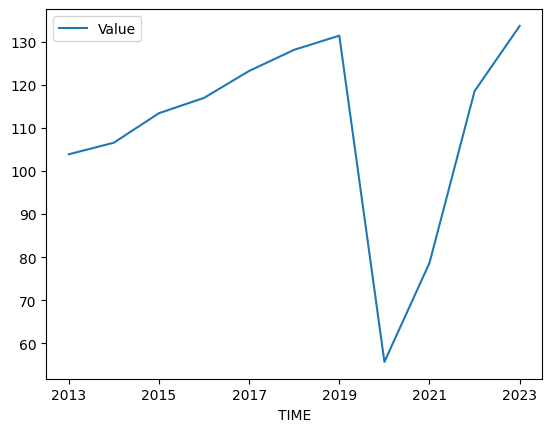

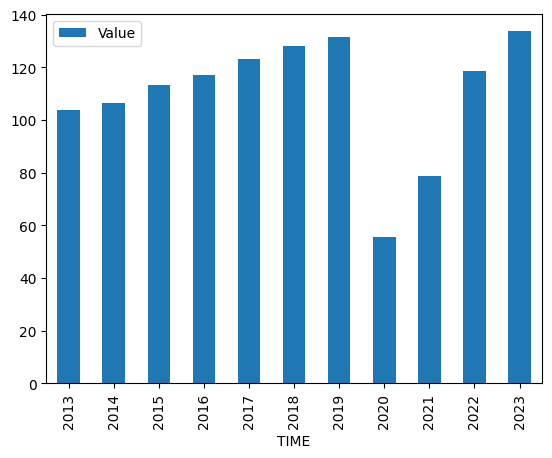

In [4]:
arrivals_per_year = df[(df['ISO'] == 'WORLD') & (df['TIPO_DATO7'] == 'AR') & (df['TIME'].apply(str).apply(len) <= 4) & (df['Paese di residenza dei clienti'] == 'Mondo')]
arrivals = arrivals_per_year[['Value', 'TIME']].set_index('TIME')
arrivals['Value'] = arrivals['Value'] / 1000000
arrivals.plot()
arrivals.plot.bar()
arrivals.head()

,Value
TIME,
2013,376.785615
2014,377.770806
2015,392.874070
2016,402.962113
2017,420.629155


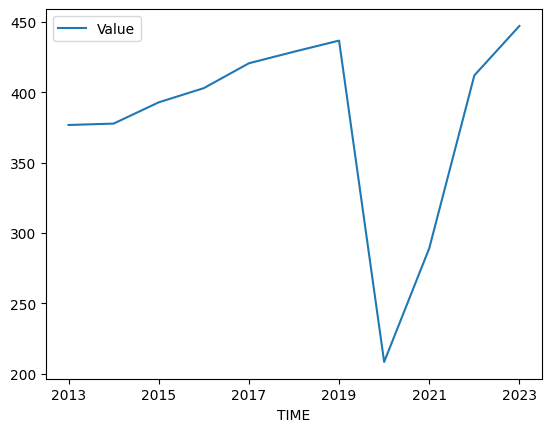

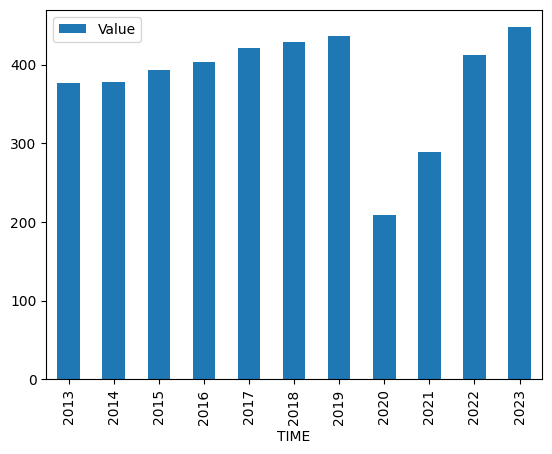

In [5]:
nights_spent_per_year = df[(df['ISO'] == 'WORLD') & (df['TIPO_DATO7'] == 'NI') & (df['TIME'].apply(str).apply(len) <= 4) & (df['Paese di residenza dei clienti'] == 'Mondo')]
nights_spent = nights_spent_per_year[['Value', 'TIME']].set_index('TIME')
nights_spent['Value'] = nights_spent['Value'] / 1000000
nights_spent.plot()
nights_spent.plot.bar()
nights_spent.head()

,Value
TIME,
2013,3.775000
2014,3.666667
2015,3.577778
2016,3.500000
2017,3.458333


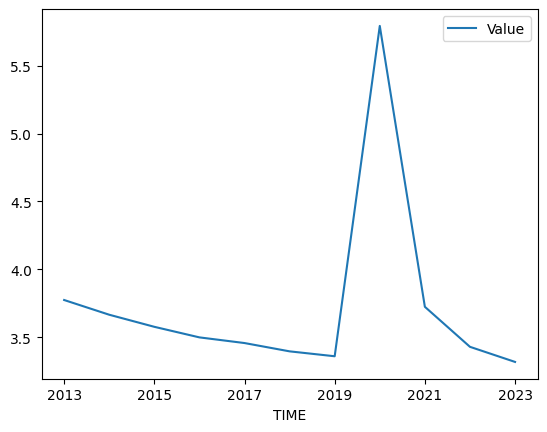

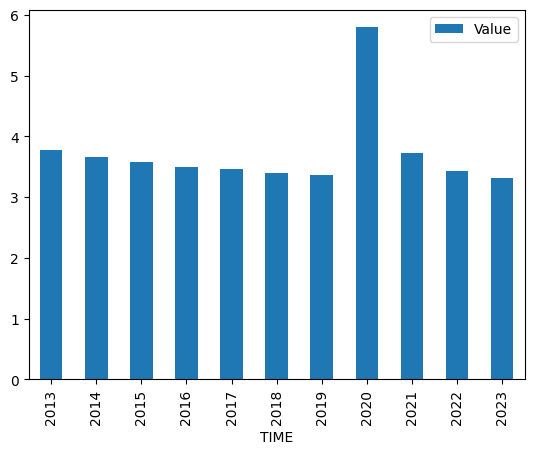

In [6]:
avg_stay_per_month = df[(df['ISO'] == 'WORLD') & (df['TIPO_DATO7'] == 'PM') & (df['Paese di residenza dei clienti'] == 'Mondo')]

avg_stay = avg_stay_per_month.copy()
avg_stay['YEAR'] = avg_stay['TIME'].str[:4]
avg_stay = avg_stay.groupby('YEAR')['Value'].mean().reset_index()
avg_stay.columns = ['TIME', 'Value']
avg_stay = avg_stay.set_index('TIME')
avg_stay.plot()
avg_stay.plot.bar()
avg_stay.head()

(0.0, 469.52855145)

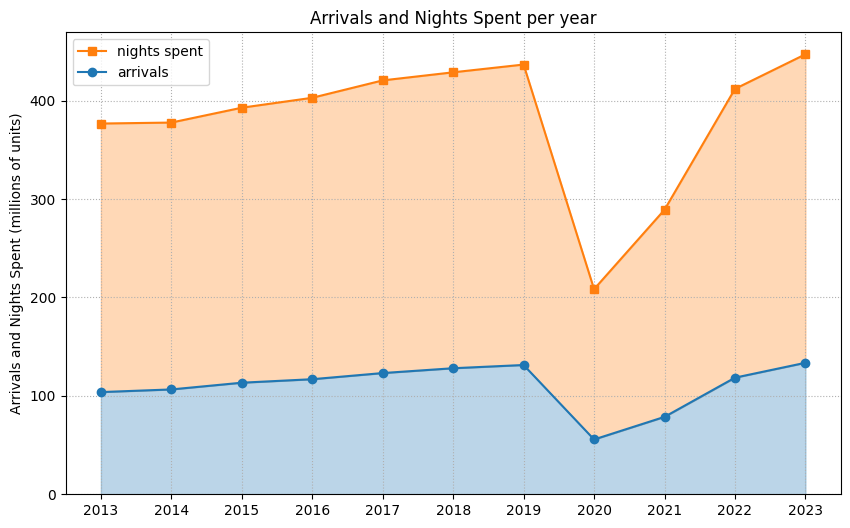

In [22]:
plt.figure(figsize=(10, 6))

plt.plot(nights_spent.index, nights_spent['Value'], 's-', label="nights spent", color='C1')
plt.fill_between(arrivals.index, arrivals['Value'], nights_spent['Value'], alpha=0.3, color='C1')

plt.plot(arrivals.index, arrivals['Value'], 'o-', label="arrivals", color='C0')
plt.fill_between(arrivals.index, arrivals['Value'], 0, alpha=0.3, color='C0')

plt.ylabel("Arrivals and Nights Spent (millions of units)")
plt.title("Arrivals and Nights Spent per year")
plt.grid(True, linestyle=':')
plt.legend()
plt.ylim(bottom=0)

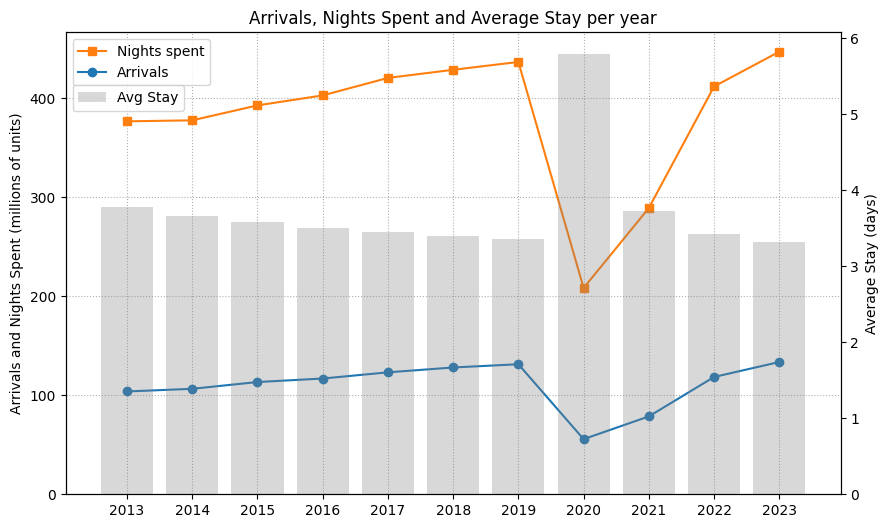

In [24]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plotting arrivals and nights spent
ax1.plot(nights_spent.index, nights_spent['Value'], 's-', label='Nights spent', color='C1')
ax1.plot(arrivals.index, arrivals['Value'], 'o-', label='Arrivals', color='C0')

ax1.set_ylabel("Arrivals and Nights Spent (millions of units)")
ax1.legend(loc='upper left')
ax1.grid(True, linestyle=':')
ax1.set_ylim(bottom=0)

# Creating a secondary y-axis for avg_stay
ax2 = ax1.twinx()
ax2.bar(avg_stay.index, avg_stay['Value'], alpha=0.3, color='gray', label='Avg Stay')
ax2.set_ylabel("Average Stay (days)")
ax2.legend(loc='upper left', bbox_to_anchor=(0, 0.9))

plt.title("Arrivals, Nights Spent and Average Stay per year")
plt.show()